In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport

# Load the dataset with low_memory=False to prevent mixed type warning
data = pd.read_csv('./Baltimore911.csv', low_memory=False)

# Show first few rows of the dataset to understand its structure
data.head()

CrimeDate CrimeTime CrimeCode            Location          Description  \
0  02/08/2020   2:18:00        5D  1700 CLIFTVIEW AVE             BURGLARY   
1  02/08/2020   6:00:00        6G   700 N STREEPER ST              LARCENY   
2  02/08/2020   9:50:00       3JF     1400 N BROADWAY  ROBBERY - RESIDENCE   
3  02/08/2020   9:50:00       3JF     1400 N BROADWAY  ROBBERY - RESIDENCE   
4  02/08/2020  17:30:00        5A    1600 E OLIVER ST             BURGLARY   

  Inside/Outside   Weapon Post District     Neighborhood  Longitude  \
0              I      NaN  312  EASTERN      DARLEY PARK -76.593870   
1              I      NaN  333  EASTERN  MADISON EASTEND -76.577425   
2              I  FIREARM  314  EASTERN           OLIVER -76.594992   
3              I  FIREARM  314  EASTERN           OLIVER -76.594992   
4              I      NaN  314  EASTERN           OLIVER -76.595946   

    Latitude  Location 1             Premise  vri_name1  Total Incidents  
0  39.315341         NaN  GROCERY/CONFECTION  Eastern 1                1  
1  39.299094         NaN   ROW/TOWNHOUSE-OCC        NaN                1  
2  39.306941         NaN   ROW/TOWNHOUSE-OCC        NaN                1  
3  39.306941         NaN   ROW/TOWNHOUSE-OCC        NaN                1  
4  39.307350         NaN   ROW/TOWNHOUSE-OCC  Eastern 1                1

In [2]:
# Get a summary of the dataset (profiling)
data.describe(include='all')

CrimeDate CrimeTime CrimeCode         Location Description  \
count       292761    292735    292761           291425      292761   
unique        2300      1475        81            27064          14   
top     04/27/2015  18:00:00        4E  1500 RUSSELL ST     LARCENY   
freq           421      6772     48061              847       65508   
mean           NaN       NaN       NaN              NaN         NaN   
std            NaN       NaN       NaN              NaN         NaN   
min            NaN       NaN       NaN              NaN         NaN   
25%            NaN       NaN       NaN              NaN         NaN   
50%            NaN       NaN       NaN              NaN         NaN   
75%            NaN       NaN       NaN              NaN         NaN   
max            NaN       NaN       NaN              NaN         NaN   

       Inside/Outside   Weapon    Post   District Neighborhood      Longitude  \
count          259001    61532  290385     292761       282257  291126.000000   
unique              4        5     133         10          278            NaN   
top                 O  FIREARM     114  NORTHEAST     DOWNTOWN            NaN   
freq           128776    29036    5227      44207         9312            NaN   
mean              NaN      NaN     NaN        NaN          NaN     -76.617452   
std               NaN      NaN     NaN        NaN          NaN       0.043734   
min               NaN      NaN     NaN        NaN          NaN     -81.529189   
25%               NaN      NaN     NaN        NaN          NaN     -76.649094   
50%               NaN      NaN     NaN        NaN          NaN     -76.613977   
75%               NaN      NaN     NaN        NaN          NaN     -76.587080   
max               NaN      NaN     NaN        NaN          NaN     -76.383228   

             Latitude  Location 1 Premise     vri_name1  Total Incidents  
count   291126.000000         0.0  258749         34584         292761.0  
unique            NaN         NaN     125             8              NaN  
top               NaN         NaN  STREET  Tri-District              NaN  
freq              NaN         NaN  104827          6607              NaN  
mean        39.306746         NaN     NaN           NaN              1.0  
std          0.029658         NaN     NaN           NaN              0.0  
min         37.577262         NaN     NaN           NaN              1.0  
25%         39.288186         NaN     NaN           NaN              1.0  
50%         39.302672         NaN     NaN           NaN              1.0  
75%         39.326965         NaN     NaN           NaN              1.0  
max         39.661332         NaN     NaN           NaN              1.0

In [3]:
# Checking for missing values
data.isnull().sum()

CrimeDate               0
CrimeTime              26
CrimeCode               0
Location             1336
Description             0
Inside/Outside      33760
Weapon             231229
Post                 2376
District                0
Neighborhood        10504
Longitude            1635
Latitude             1635
Location 1         292761
Premise             34012
vri_name1          258177
Total Incidents         0
dtype: int64

In [4]:
# Data types of each column
data.dtypes


CrimeDate           object
CrimeTime           object
CrimeCode           object
Location            object
Description         object
Inside/Outside      object
Weapon              object
Post                object
District            object
Neighborhood        object
Longitude          float64
Latitude           float64
Location 1         float64
Premise             object
vri_name1           object
Total Incidents      int64
dtype: object

In [5]:
# Generate the profiling report
profile = ProfileReport(data, title="Baltimore 911 Dataset Profiling Report")

# Display the report directly in Jupyter Notebook (if you're using Jupyter)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
# Create a profile report
profile = ProfileReport(data, title="Baltimore 911 Data Profiling Report", explorative=True)

# Save the report as an HTML file
profile.to_file("Baltimore911_Profiling_Report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
print("---------Columns Names-------")
column_names = data.columns
print("Column Names:", column_names)
data.shape

---------Columns Names-------
Column Names: Index(['CrimeDate', 'CrimeTime', 'CrimeCode', 'Location', 'Description',
       'Inside/Outside', 'Weapon', 'Post', 'District', 'Neighborhood',
       'Longitude', 'Latitude', 'Location 1', 'Premise', 'vri_name1',
       'Total Incidents'],
      dtype='object')


(292761, 16)

In [8]:
# Convert 'CrimeDate' to datetime and 'CrimeTime' to time
data['CrimeDate'] = pd.to_datetime(data['CrimeDate'], errors='coerce')

# Fill missing 'CrimeTime' values with 'N/A'
data['CrimeTime'] = data['CrimeTime'].fillna('N/A')

# Retry converting 'CrimeTime' to time format
data['CrimeTime'] = pd.to_datetime(data['CrimeTime'], format='%H:%M:%S', errors='coerce').dt.time

# Check if the conversion was successful and display the first few rows of the updated column
data[['CrimeDate', 'CrimeTime']].head()

CrimeDate CrimeTime
0 2020-02-08  02:18:00
1 2020-02-08  06:00:00
2 2020-02-08  09:50:00
3 2020-02-08  09:50:00
4 2020-02-08  17:30:00

In [9]:
# Replace 'Outside' with 'O' and 'Inside' with 'I' in the 'Inside/Outside' column
data['Inside/Outside'] = data['Inside/Outside'].replace({'Outside': 'O', 'Inside': 'I'})

# Verify the replacement by checking the unique values in the column
data['Inside/Outside'].unique()


array(['I', 'O', nan], dtype=object)

In [10]:
# Fill missing values in 'Inside/Outside' column with 'N/A'
data['Inside/Outside'] = data['Inside/Outside'].fillna('N/A')

# Verify the replacement by checking the unique values again
data['Inside/Outside'].unique()


array(['I', 'O', 'N/A'], dtype=object)

In [11]:
# Remove the 'Location 1' column as it is empty
data = data.drop(columns=['Location 1'])

# Verify that the column has been removed
data.columns


Index(['CrimeDate', 'CrimeTime', 'CrimeCode', 'Location', 'Description',
       'Inside/Outside', 'Weapon', 'Post', 'District', 'Neighborhood',
       'Longitude', 'Latitude', 'Premise', 'vri_name1', 'Total Incidents'],
      dtype='object')

In [12]:
# Remove rows where 'CrimeDate' is from 2010 or earlier
data = data[data['CrimeDate'].dt.year > 2010]

In [13]:
# Check for duplicates based on all columns
duplicate_rows = data[data.duplicated()]

# Remove duplicates
df_cleaned = data.drop_duplicates()

# Display the number of duplicates found and the shape of the cleaned dataset
num_duplicates = len(duplicate_rows)
cleaned_shape = df_cleaned.shape

num_duplicates, cleaned_shape


(11442, (281271, 15))

In [14]:
# Total number of call instances/rows and features/columns
total_rows = df_cleaned.shape[0]
total_columns = df_cleaned.shape[1]

# Initialize lists to store profiling results
column_type_info = []

# Iterate through each column
for column in df_cleaned.columns:
    column_info = {}
    column_info['Column Name'] = column

    # Check if the column is numeric
    if pd.api.types.is_numeric_dtype(df_cleaned[column]):
        column_info['Type'] = 'Numeric'
        column_info['Min'] = df_cleaned[column].min()
        column_info['Max'] = df_cleaned[column].max()
        column_info['Mean'] = df_cleaned[column].mean()
        column_info['Median'] = df_cleaned[column].median()
        column_info['Std'] = df_cleaned[column].std()
        column_info['Missing (%)'] = df_cleaned[column].isna().mean() * 100

    # Check if the column is discrete/symbolic
    elif pd.api.types.is_object_dtype(df_cleaned[column]):
        column_info['Type'] = 'Discrete/Symbolic'
        column_info['Unique Count'] = df_cleaned[column].nunique()
        column_info['Top 3 Values'] = df_cleaned[column].value_counts().head(3).to_dict()
        column_info['Missing (%)'] = df_cleaned[column].isna().mean() * 100

    # Check if the column belongs to temporal or spatial categories
    elif pd.api.types.is_datetime64_any_dtype(df_cleaned[column]):
        column_info['Type'] = 'Temporal'
        column_info['Missing (%)'] = df_cleaned[column].isna().mean() * 100
    
    # Spatial data typically includes latitude and longitude
    elif 'Longitude' in column or 'Latitude' in column:
        column_info['Type'] = 'Spatial'
        column_info['Min'] = df_cleaned[column].min()
        column_info['Max'] = df_cleaned[column].max()
        column_info['Mean'] = df_cleaned[column].mean()
        column_info['Median'] = df_cleaned[column].median()
        column_info['Std'] = df_cleaned[column].std()
        column_info['Missing (%)'] = df_cleaned[column].isna().mean() * 100

    column_type_info.append(column_info)

# Create a DataFrame to present the profiling results
profiling_df = pd.DataFrame(column_type_info)

# Display the DataFrame in Jupyter Notebook
display(profiling_df)

Column Name               Type  Missing (%)  Unique Count  \
0         CrimeDate           Temporal     0.000000           NaN   
1         CrimeTime  Discrete/Symbolic     0.009244        1475.0   
2         CrimeCode  Discrete/Symbolic     0.000000          81.0   
3          Location  Discrete/Symbolic     0.452233       27064.0   
4       Description  Discrete/Symbolic     0.000000          14.0   
5    Inside/Outside  Discrete/Symbolic     0.000000           3.0   
6            Weapon  Discrete/Symbolic    80.099619           5.0   
7              Post  Discrete/Symbolic     0.801007         133.0   
8          District  Discrete/Symbolic     0.000000          10.0   
9      Neighborhood  Discrete/Symbolic     3.565600         278.0   
10        Longitude            Numeric     0.556403           NaN   
11         Latitude            Numeric     0.556403           NaN   
12          Premise  Discrete/Symbolic    11.548293         125.0   
13        vri_name1  Discrete/Symbolic    88.211014           8.0   
14  Total Incidents            Numeric     0.000000           NaN   

                                         Top 3 Values        Min        Max  \
0                                                 NaN        NaN        NaN   
1    {18:00:00: 6607, 17:00:00: 6320, 12:00:00: 5940}        NaN        NaN   
2             {'4E': 44879, '6D': 38140, '5A': 25109}        NaN        NaN   
3   {'1500 RUSSELL ST': 795, '3500 BOSTON ST': 700...        NaN        NaN   
4   {'LARCENY': 64726, 'COMMON ASSAULT': 44879, 'B...        NaN        NaN   
5            {'O': 128237, 'I': 120792, 'N/A': 32242}        NaN        NaN   
6   {'FIREARM': 25571, 'OTHER': 15925, 'KNIFE': 9452}        NaN        NaN   
7             {'114': 5013, '913': 4750, '212': 4689}        NaN        NaN   
8   {'NORTHEAST': 42657, 'SOUTHEAST': 40193, 'CENT...        NaN        NaN   
9   {'DOWNTOWN': 8903, 'FRANKFORD': 6679, 'BELAIR-...        NaN        NaN   
10                                                NaN -81.529189 -76.383228   
11                                                NaN  37.577262  39.661332   
12  {'STREET': 100285, 'ROW/TOWNHOUSE-OCC': 52193,...        NaN        NaN   
13  {'Tri-District': 6356, 'Western': 5590, 'Centr...        NaN        NaN   
14                                                NaN   1.000000   1.000000   

         Mean     Median       Std  
0         NaN        NaN       NaN  
1         NaN        NaN       NaN  
2         NaN        NaN       NaN  
3         NaN        NaN       NaN  
4         NaN        NaN       NaN  
5         NaN        NaN       NaN  
6         NaN        NaN       NaN  
7         NaN        NaN       NaN  
8         NaN        NaN       NaN  
9         NaN        NaN       NaN  
10 -76.617418 -76.613935  0.043795  
11  39.306865  39.302882  0.029657  
12        NaN        NaN       NaN  
13        NaN        NaN       NaN  
14   1.000000   1.000000  0.000000

### Comment on anything surprising/strange/unique you noted from the data profile.

The dataset includes various columns with different types of data, including temporal, symbolic, and numeric values. For instance, 'CrimeDate' is a temporal field with no missing data, while 'CrimeTime' has 1,475 unique values and is missing data in 0.92% of rows. The 'CrimeCode' column has 81 unique values, with '4E' being the most common. 'Location' lists 27,064 unique places, and 'Description' describes the crime types, with 'LARCENY' being the most frequent. Some columns, like 'Weapon', have significant missing data (80%), and the 'Inside/Outside' field, indicating the crime location, has 3 distinct values. The 'Longitude' and 'Latitude' columns provide spatial data with small percentages of missing values. 'Premise' gives details about the crime location type, while the 'vri_name1' field has a high missing rate (88%). The 'Total Incidents' column is constant across all rows, which limits its usefulness. Overall, the dataset has some important gaps in the 'Weapon' and 'vri_name1' columns, and the 'Total Incidents' column doesn’t offer any variability for analysis.

### Generate a series of plots to describe the temporal pattern (year-to-year, monthly, and day-of-week) of the overall crime incidence aggregating from all geo-locations

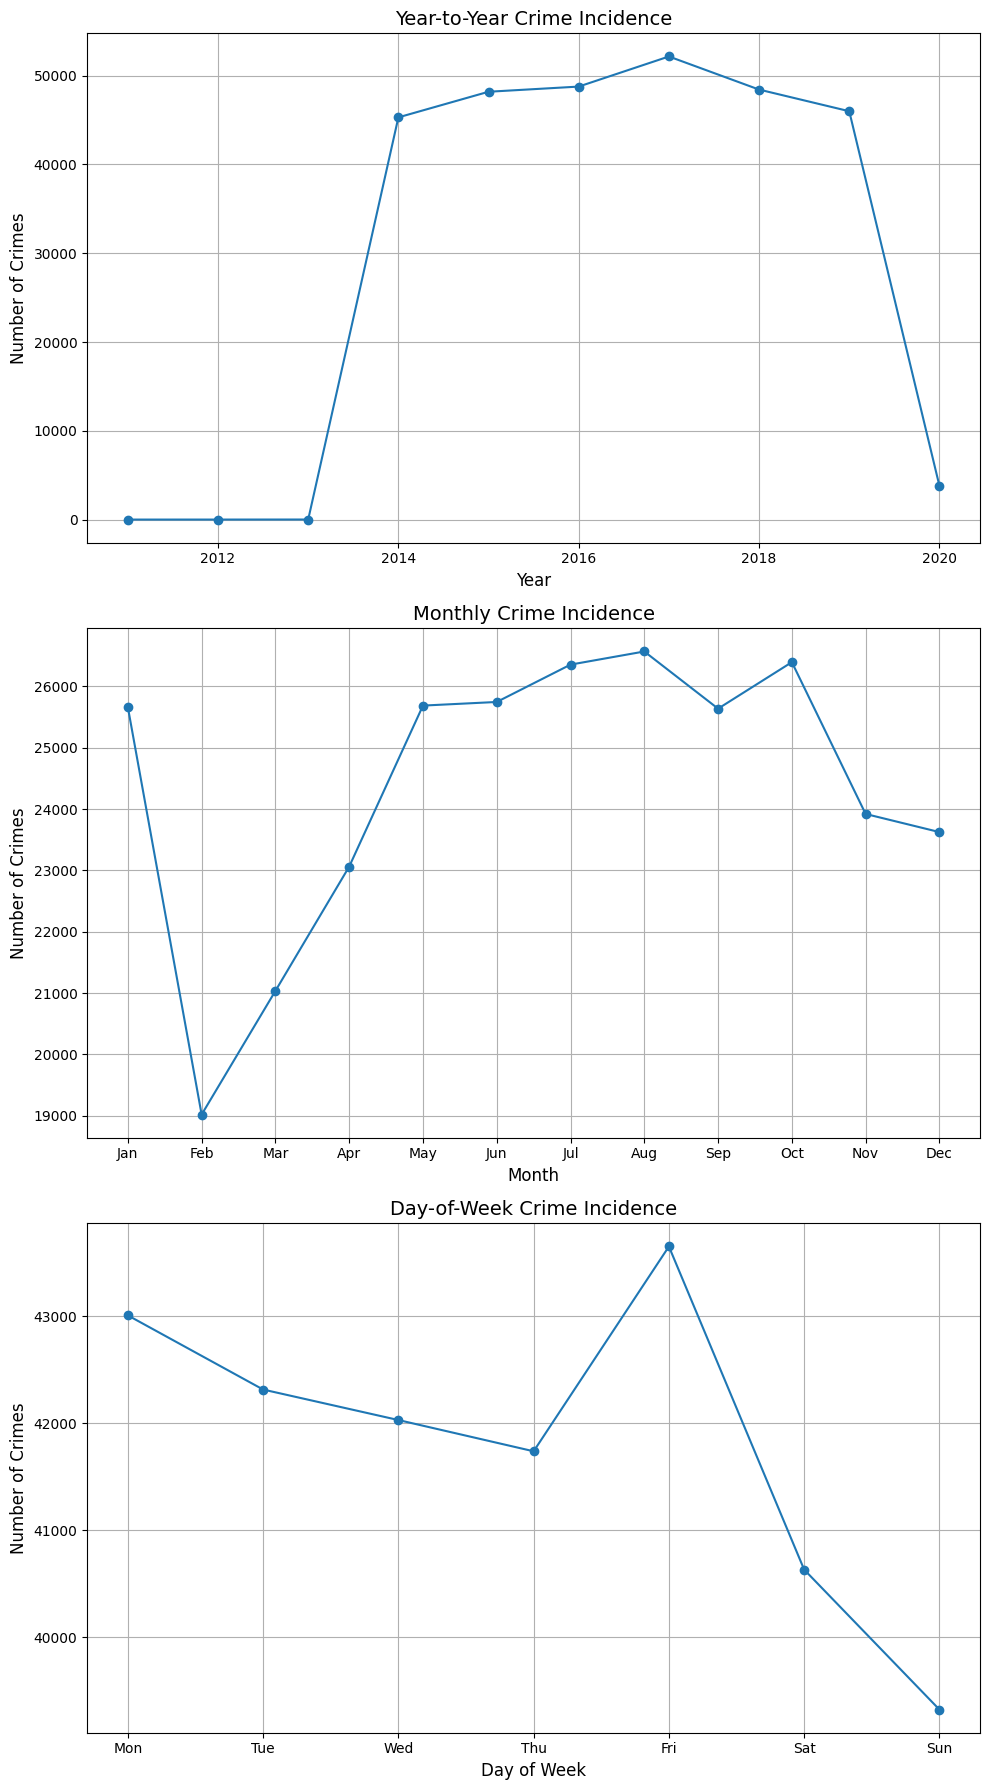

In [15]:
# Ensure 'CrimeDate' is in datetime format
data['CrimeDate'] = pd.to_datetime(data['CrimeDate'], errors='coerce')

# Ensure Matplotlib plots display inline within Jupyter
%matplotlib inline

# Set up subplots for year-to-year, monthly, and day-of-week crime trends
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

# Plot 1: Year-to-Year Crime Incidence
yearly_crimes = data['CrimeDate'].dt.year.value_counts().sort_index()
axes[0].plot(yearly_crimes.index, yearly_crimes.values, marker='o')
axes[0].set_title('Year-to-Year Crime Incidence', fontsize=14)
axes[0].set_xlabel('Year', fontsize=12)
axes[0].set_ylabel('Number of Crimes', fontsize=12)
axes[0].grid(True)

# Plot 2: Monthly Crime Incidence
monthly_crimes = data['CrimeDate'].dt.month.value_counts().sort_index()
axes[1].plot(monthly_crimes.index, monthly_crimes.values, marker='o')
axes[1].set_title('Monthly Crime Incidence', fontsize=14)
axes[1].set_xlabel('Month', fontsize=12)
axes[1].set_ylabel('Number of Crimes', fontsize=12)
axes[1].set_xticks(range(1, 13))
axes[1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
axes[1].grid(True)

# Plot 3: Day-of-Week Crime Incidence
day_of_week_crimes = data['CrimeDate'].dt.dayofweek.value_counts().sort_index()
axes[2].plot(day_of_week_crimes.index, day_of_week_crimes.values, marker='o')
axes[2].set_title('Day-of-Week Crime Incidence', fontsize=14)
axes[2].set_xlabel('Day of Week', fontsize=12)
axes[2].set_ylabel('Number of Crimes', fontsize=12)
axes[2].set_xticks(range(7))
axes[2].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
axes[2].grid(True)

plt.tight_layout()
plt.show()

### Generate a plot describing the distribution of crime type aggregating from all geo-locations and all time periods

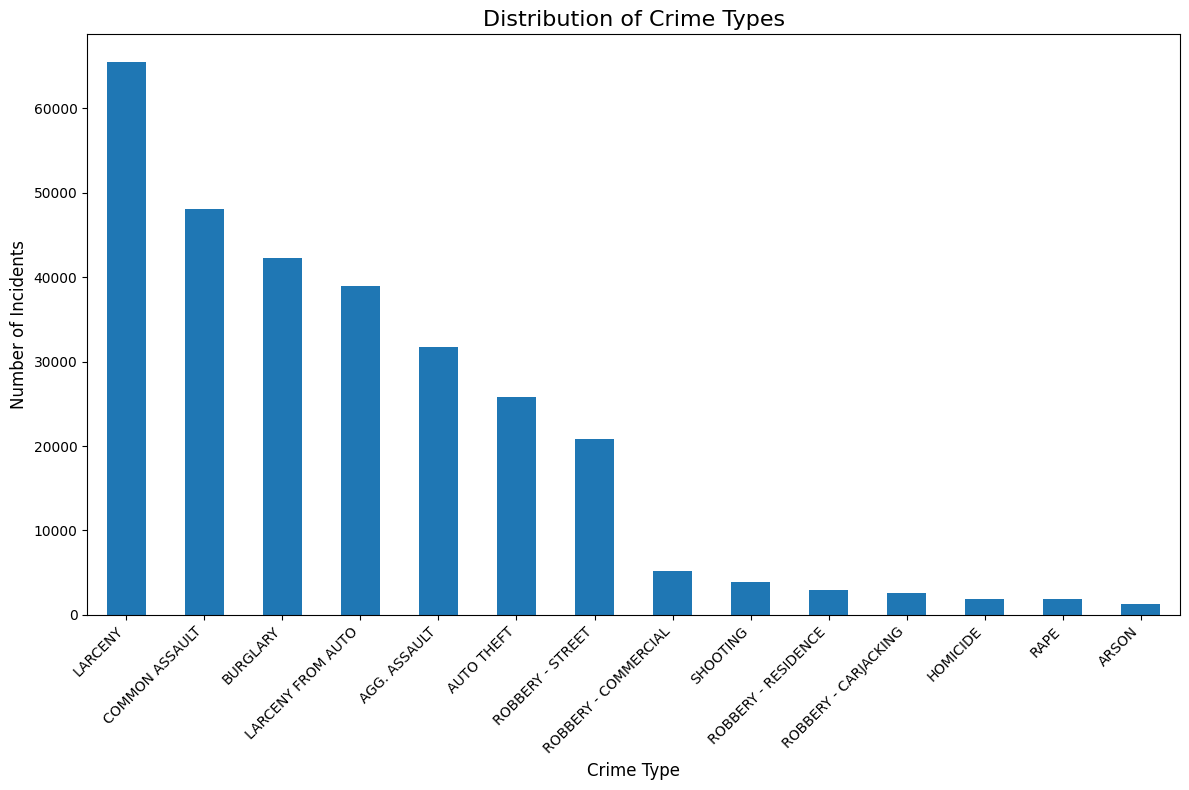

In [16]:
# Generate a plot for the distribution of crime types (Description column)
crime_type_counts = data['Description'].value_counts()

# Plot the distribution of crime types
plt.figure(figsize=(12, 8))
crime_type_counts.plot(kind='bar')
plt.title('Distribution of Crime Types', fontsize=16)
plt.xlabel('Crime Type', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Generate a series of plots to illustrate how crime type distributions might vary from year-to-year, month-to-month, or by day-of-week aggregating across all locations

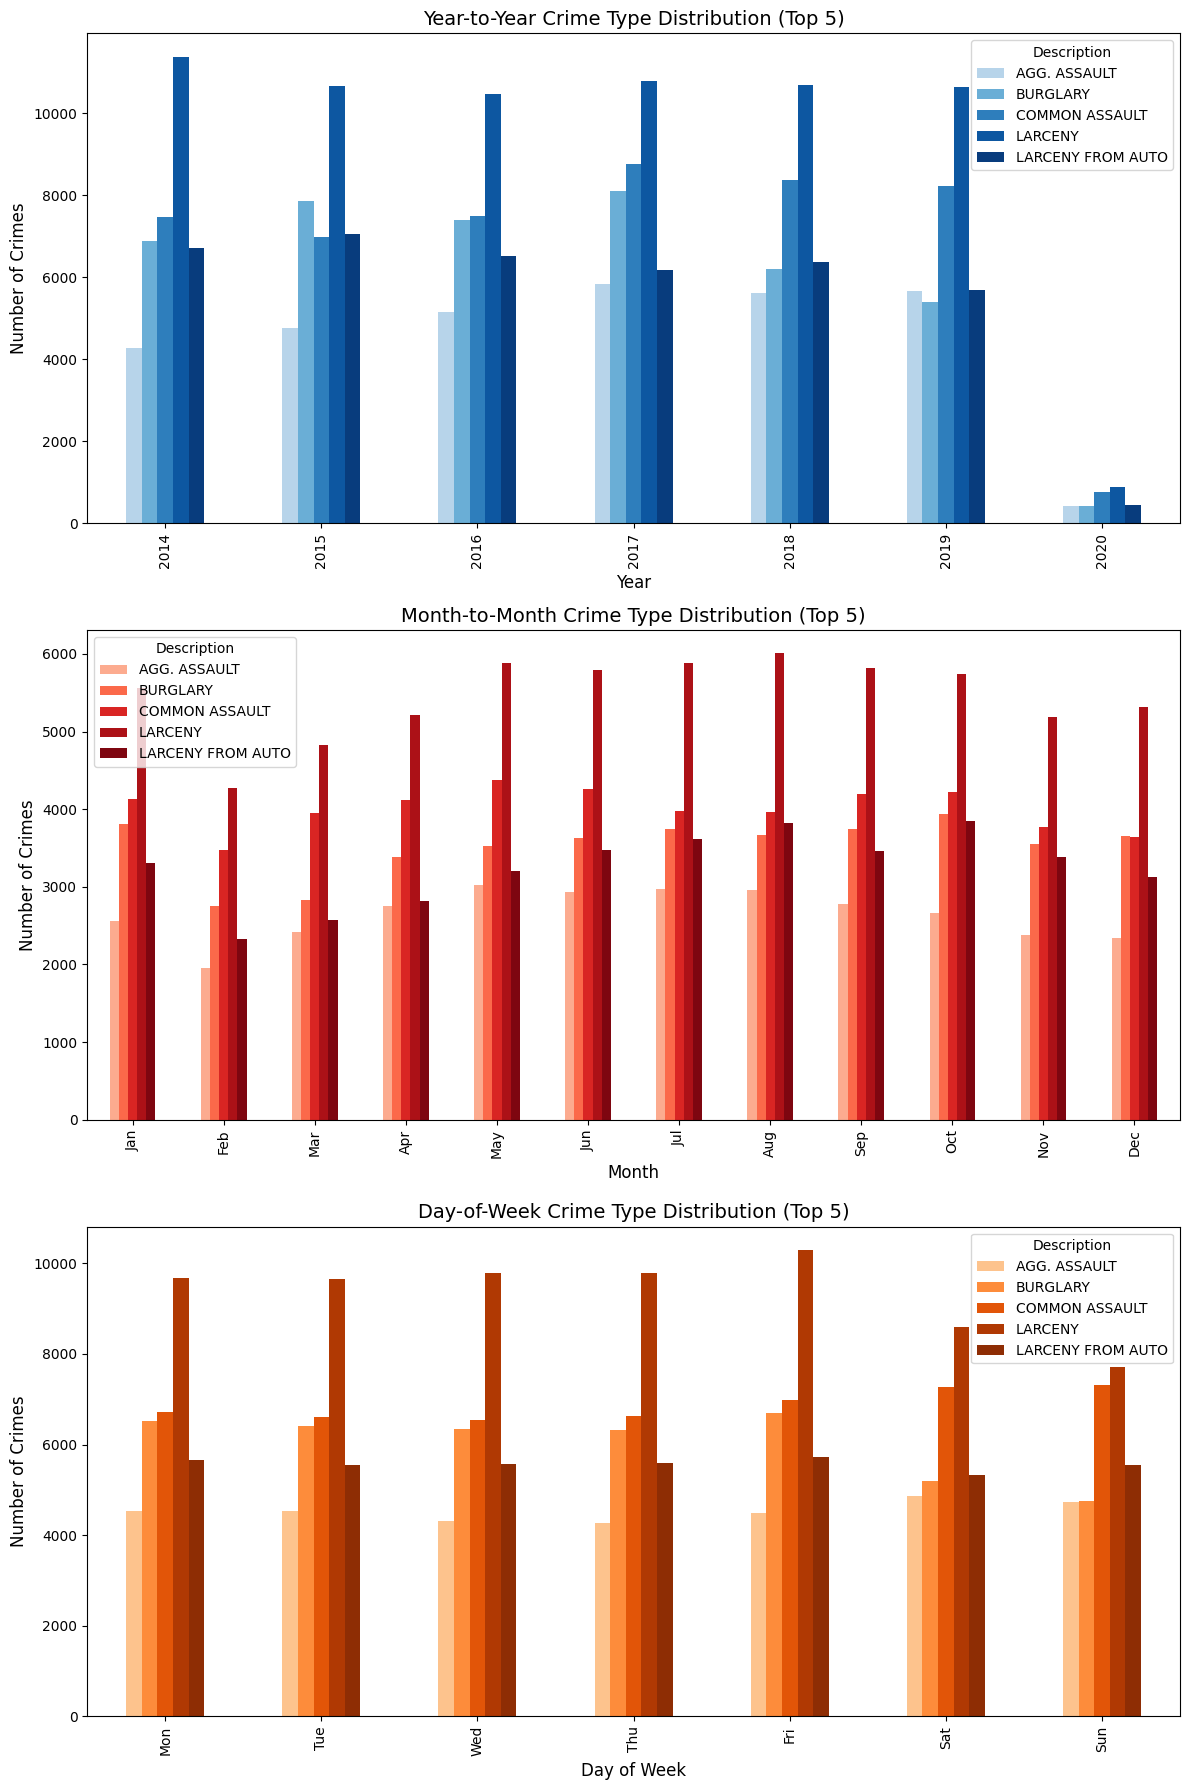

In [21]:
# Limit the number of crime types to avoid clutter in the plots (top 5 crime types)
top_crime_types = data['Description'].value_counts().index[:5]

# Filter data for the top crime types
filtered_data = data[data['Description'].isin(top_crime_types)]

# Group the data for year-to-year, month-to-month, and day-of-week distributions
yearly_crime_types = filtered_data.groupby([filtered_data['CrimeDate'].dt.year, 'Description']).size().unstack(fill_value=0)
monthly_crime_types = filtered_data.groupby([filtered_data['CrimeDate'].dt.month, 'Description']).size().unstack(fill_value=0)
day_of_week_crime_types = filtered_data.groupby([filtered_data['CrimeDate'].dt.dayofweek, 'Description']).size().unstack(fill_value=0)

# Set up subplots for year-to-year, month-to-month, and day-of-week grouped bar plots for crime type distribution with blue shades
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Define a color map using shades of blue
blue_colors = plt.cm.Blues([0.3, 0.5, 0.7, 0.85, 0.95])
red_colors = plt.cm.Reds([0.3, 0.5, 0.7, 0.85, 0.95])
orange_colors = plt.cm.Oranges([0.3, 0.5, 0.7, 0.85, 0.95])


# Plot 1: Year-to-Year Crime Type Distribution (grouped bar plot)
yearly_crime_types.plot(kind='bar', ax=axes[0], color=blue_colors)
axes[0].set_title('Year-to-Year Crime Type Distribution (Top 5)', fontsize=14)
axes[0].set_xlabel('Year', fontsize=12)
axes[0].set_ylabel('Number of Crimes', fontsize=12)

# Plot 2: Month-to-Month Crime Type Distribution (grouped bar plot)
monthly_crime_types.plot(kind='bar', ax=axes[1], color=red_colors)
axes[1].set_title('Month-to-Month Crime Type Distribution (Top 5)', fontsize=14)
axes[1].set_xlabel('Month', fontsize=12)
axes[1].set_ylabel('Number of Crimes', fontsize=12)
axes[1].set_xticks(range(12))
axes[1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Plot 3: Day-of-Week Crime Type Distribution (grouped bar plot)
day_of_week_crime_types.plot(kind='bar', ax=axes[2], color=orange_colors)
axes[2].set_title('Day-of-Week Crime Type Distribution (Top 5)', fontsize=14)
axes[2].set_xlabel('Day of Week', fontsize=12)
axes[2].set_ylabel('Number of Crimes', fontsize=12)
axes[2].set_xticks(range(7))
axes[2].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

plt.tight_layout()
plt.show()
